## Funciones

In [7]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [8]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

In [9]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [10]:
datos = pd.read_csv("winequalityN.csv") 

In [11]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
x = datos.drop(['quality'], axis=1)
y = datos['quality']

In [13]:
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

## Oversampling

In [15]:
random_over = RandomOverSampler()

In [16]:
x_over, y_over = random_over.fit_resample(x, y)

In [17]:
np.unique(y_over, return_counts=True)

(array([3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([2836, 2836, 2836, 2836, 2836, 2836, 2836], dtype=int64))

In [18]:
datos_over = pd.concat([x_over, y_over], axis=1)

In [19]:
datos_over

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
19848,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
19849,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
19850,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [20]:
datos_over['quality'].value_counts()

quality
6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: count, dtype: int64

<Axes: title={'center': 'OverS'}, xlabel='quality'>

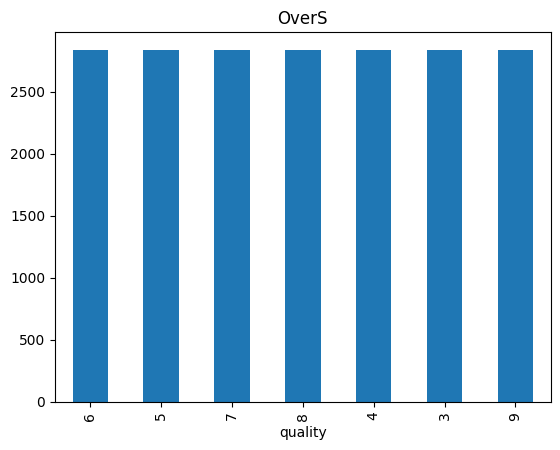

In [21]:
datos_over['quality'].value_counts().plot(kind='bar', title='OverS')

In [22]:
red_wine_data = datos_over[datos_over['type'] == 'red']
white_wine_data = datos_over[datos_over['type'] == 'white']

In [23]:
print(f"Número de datos de vino tinto: {len(red_wine_data)}")
print(f"Número de datos de vino blanco: {len(white_wine_data)}")

Número de datos de vino tinto: 3877
Número de datos de vino blanco: 15975


In [24]:
datos_over.loc[datos_over['type'] == 'red', 'type'] = 0
datos_over.loc[datos_over['type'] == 'white', 'type'] = 1

In [25]:
red_wine_data = datos_over[datos_over['type'] == 0]
white_wine_data = datos_over[datos_over['type'] == 1]

In [26]:
print(f"Número de datos de vino tinto: {len(red_wine_data)}")
print(f"Número de datos de vino blanco: {len(white_wine_data)}")

Número de datos de vino tinto: 3877
Número de datos de vino blanco: 15975


In [27]:
X = datos_over.drop('quality', axis=1)
Y = datos_over['quality']

In [28]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

In [29]:
data_normalized

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.492625,-0.221159,-0.455002,0.275873,3.593845,-0.188886,0.50658,0.886763,2.182716,-1.436463,-0.431672,-1.532367
1,0.492625,-0.748202,-0.309551,0.136099,-0.776988,-0.084295,-0.636734,0.272761,-0.000639,0.363027,-0.15483,-1.014123
2,0.492625,0.607053,-0.406519,0.555423,0.435861,-0.058147,-0.046636,-0.292768,0.342459,0.123095,-0.500882,-0.569915
3,0.492625,-0.070575,-0.648937,-0.003676,0.802004,0.151036,0.580342,1.14529,0.498413,-0.296786,-0.777725,-0.717984
4,0.492625,-0.070575,-0.648937,-0.003676,0.802004,0.151036,0.580342,1.14529,0.498413,-0.296786,-0.777725,-0.717984
...,...,...,...,...,...,...,...,...,...,...,...,...
19847,0.492625,-0.522326,-0.018649,-0.213338,-0.776988,-0.816436,-0.267923,-0.486663,-1.357439,1.022841,0.675697,1.132885
19848,0.492625,0.080009,-0.600453,0.275873,-0.685453,-0.554957,-0.15728,0.385866,-1.076722,0.243061,-0.22404,1.20692
19849,0.492625,-0.145867,-0.503486,1.184409,-0.639685,-0.528809,-0.009755,-0.03424,-1.154699,0.782909,-0.639304,1.503059
19850,0.492625,-0.145867,-0.503486,1.184409,-0.639685,-0.528809,-0.009755,-0.03424,-1.154699,0.782909,-0.639304,1.503059


## Correlación

<Axes: >

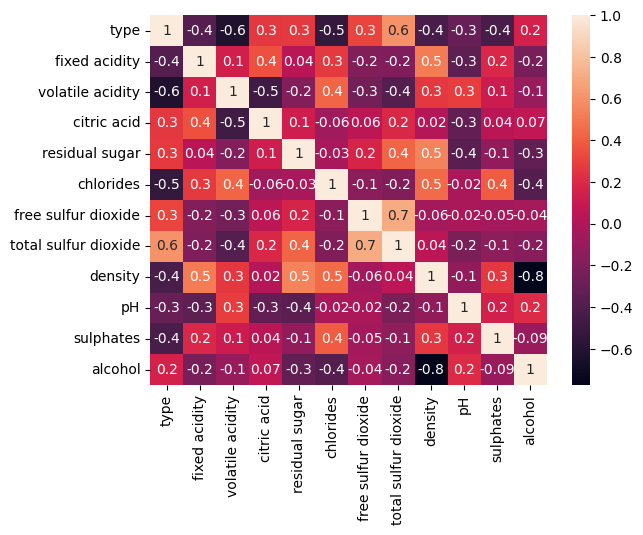

In [30]:
sns.heatmap(data_normalized.corr(),annot=True,fmt=".0g")

In [31]:
data_normalized = data_normalized.drop('total sulfur dioxide', axis=1)

<Axes: >

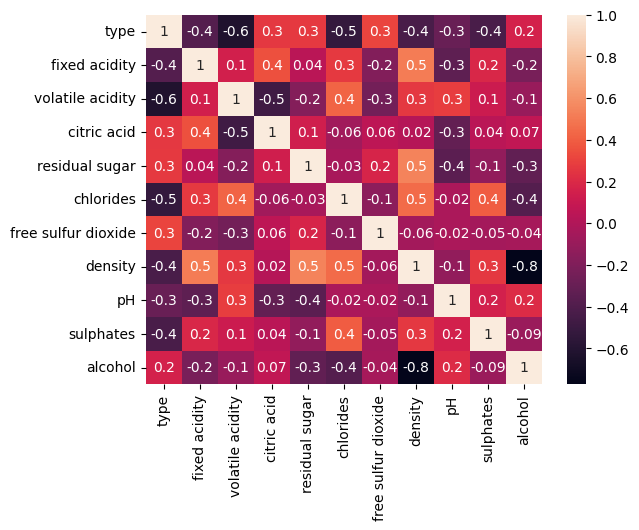

In [32]:
sns.heatmap(data_normalized.corr(),annot=True,fmt=".0g")

# División Base de Datos

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_normalized ,Y, test_size=0.3, random_state=42)

In [34]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de actualizar y_train también

X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Asegúrate de actualizar y_val también

# Luego, puedes usar X_train y X_val en tu modelo KNeighborsClassifier

In [31]:
# Verificar la forma de los conjuntos de datos después de eliminar filas con valores faltantes
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

print("\nForma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (13837, 11)
Forma de y_train: (13837,)

Forma de X_val: (5920, 11)
Forma de y_val: (5920,)


## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

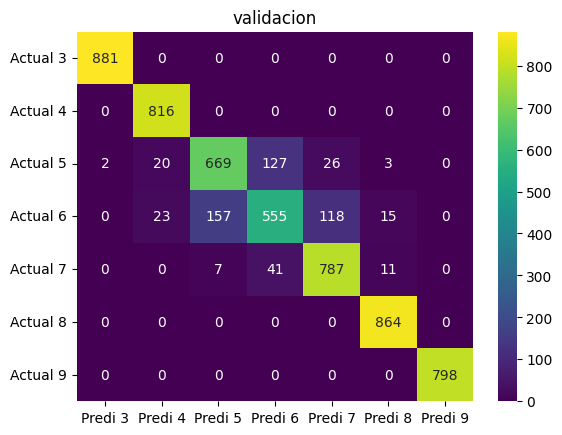

In [34]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

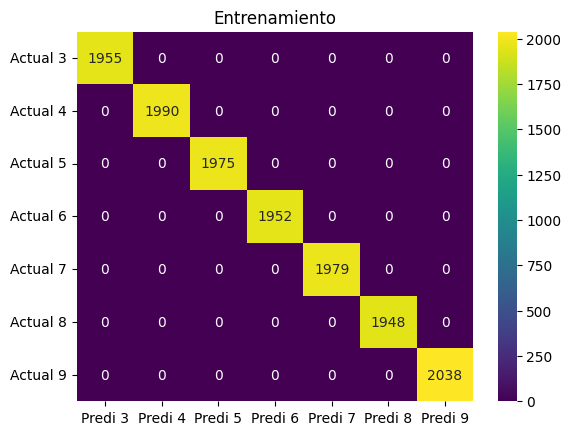

In [35]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [36]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.9070945945945946
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.95      1.00      0.97       816
           5       0.80      0.79      0.80       847
           6       0.77      0.64      0.70       868
           7       0.85      0.93      0.89       846
           8       0.97      1.00      0.98       864
           9       1.00      1.00      1.00       798

    accuracy                           0.91      5920
   macro avg       0.90      0.91      0.91      5920
weighted avg       0.90      0.91      0.90      5920



In [37]:
resultadosModelo(y_train, y_test_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1990
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1979
           8       1.00      1.00      1.00      1948
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13837
   macro avg       1.00      1.00      1.00     13837
weighted avg       1.00      1.00      1.00     13837



## Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

r_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_val)

In [203]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)

best_params = best_model.get_params
best_params

c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 638, in _validate_params
  

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=400, random_state=42)>

<Axes: title={'center': 'Validacion'}>

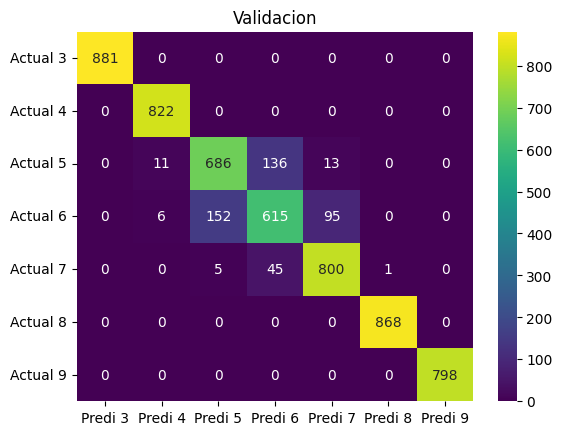

In [204]:
plot(y_val,y_pred_prueba,'Validacion')

In [205]:
resultadosModelo(y_val, y_pred_prueba)

Precisión: 0.9218065385911696
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.98      1.00      0.99       822
           5       0.81      0.81      0.81       846
           6       0.77      0.71      0.74       868
           7       0.88      0.94      0.91       851
           8       1.00      1.00      1.00       868
           9       1.00      1.00      1.00       798

    accuracy                           0.92      5934
   macro avg       0.92      0.92      0.92      5934
weighted avg       0.92      0.92      0.92      5934



In [206]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 400}

<Axes: title={'center': 'Validacion'}>

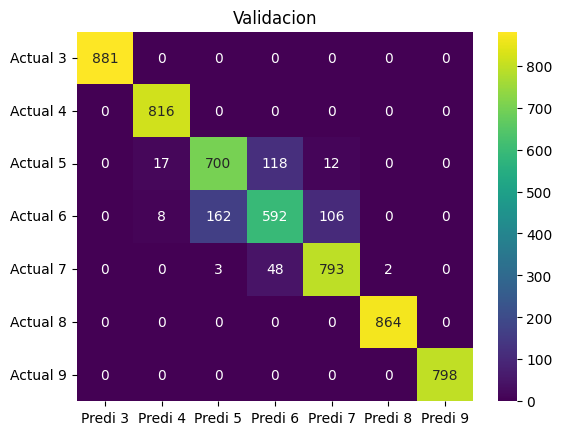

In [41]:
plot(y_val,y_pred,'Validacion')

<Axes: title={'center': 'Entrenamiento'}>

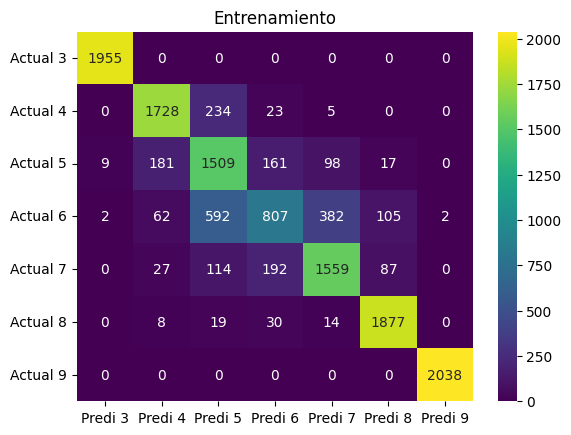

In [42]:
plot(y_train,y_test_prueba,'Entrenamiento')

In [43]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9195945945945946
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.97      1.00      0.98       816
           5       0.81      0.83      0.82       847
           6       0.78      0.68      0.73       868
           7       0.87      0.94      0.90       846
           8       1.00      1.00      1.00       864
           9       1.00      1.00      1.00       798

    accuracy                           0.92      5920
   macro avg       0.92      0.92      0.92      5920
weighted avg       0.92      0.92      0.92      5920



In [44]:
resultadosModelo(y_train,y_test_prueba)

Precisión: 0.8291537182915372
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.99      1.00      1.00      1955
           4       0.86      0.87      0.86      1990
           5       0.61      0.76      0.68      1975
           6       0.67      0.41      0.51      1952
           7       0.76      0.79      0.77      1979
           8       0.90      0.96      0.93      1948
           9       1.00      1.00      1.00      2038

    accuracy                           0.83     13837
   macro avg       0.83      0.83      0.82     13837
weighted avg       0.83      0.83      0.82     13837



## Arboles de Decisión

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [46]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_train_prueba3 = best_model.predict(X_train)

best_params = best_model.get_params

c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 638, in _validate_para

In [48]:
best_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')>

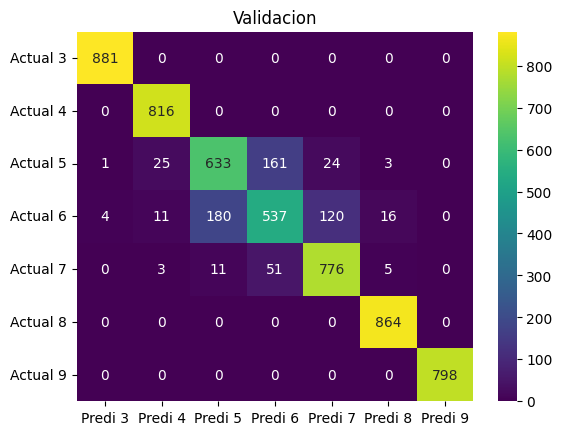

In [49]:
plot(y_val,y_pred_prueba3,"Validacion")
plt.savefig('mejorArbolV.eps', format='eps')

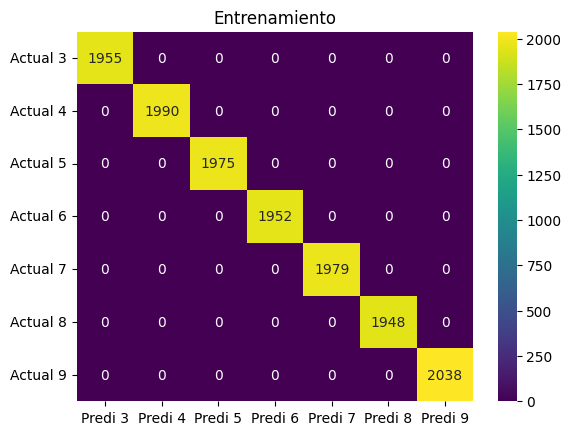

In [50]:
plot(y_train,y_train_prueba3,"Entrenamiento")
plt.savefig('mejorArbolE.eps', format='eps')

In [51]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.8961148648648649
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       881
           4       0.95      1.00      0.98       816
           5       0.77      0.75      0.76       847
           6       0.72      0.62      0.66       868
           7       0.84      0.92      0.88       846
           8       0.97      1.00      0.99       864
           9       1.00      1.00      1.00       798

    accuracy                           0.90      5920
   macro avg       0.89      0.90      0.89      5920
weighted avg       0.89      0.90      0.89      5920



In [52]:
resultadosModelo(y_train, y_train_prueba3)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1990
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1979
           8       1.00      1.00      1.00      1948
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13837
   macro avg       1.00      1.00      1.00     13837
weighted avg       1.00      1.00      1.00     13837



## SVM

In [53]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=0.01)
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

In [54]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_train_prueba4 = best_model.predict(X_train)

best_params = best_model.get_params

c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py", line 638, in _validate_param

In [55]:
best_params=grid_search.best_params_

best_params

{'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

<Axes: title={'center': 'Validacion'}>

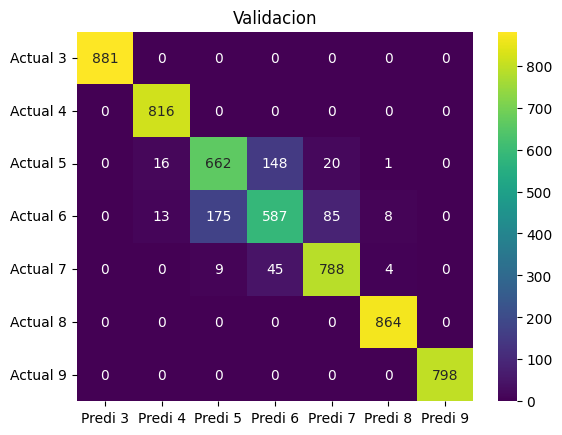

In [56]:
plot(y_val,y_pred_prueba4,"Validacion")


<Axes: title={'center': 'Entrenamiento'}>

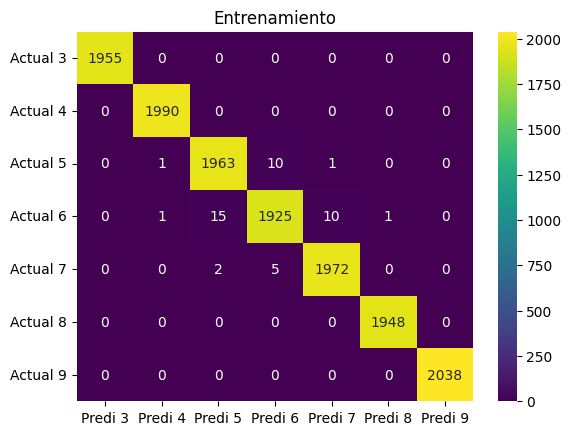

In [57]:
plot(y_train,y_train_prueba4,"Entrenamiento")


In [58]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.9114864864864864
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.97      1.00      0.98       816
           5       0.78      0.78      0.78       847
           6       0.75      0.68      0.71       868
           7       0.88      0.93      0.91       846
           8       0.99      1.00      0.99       864
           9       1.00      1.00      1.00       798

    accuracy                           0.91      5920
   macro avg       0.91      0.91      0.91      5920
weighted avg       0.91      0.91      0.91      5920



In [59]:
resultadosModelo(y_train, y_train_prueba4)

Precisión: 0.9966755799667558
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1990
           5       0.99      0.99      0.99      1975
           6       0.99      0.99      0.99      1952
           7       0.99      1.00      1.00      1979
           8       1.00      1.00      1.00      1948
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13837
   macro avg       1.00      1.00      1.00     13837
weighted avg       1.00      1.00      1.00     13837



## MLP

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10000)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10000)

In [37]:
y_pred5 = mlp.predict(X_val)
y_train5 = mlp.predict(X_train)

<Axes: title={'center': 'Val'}>

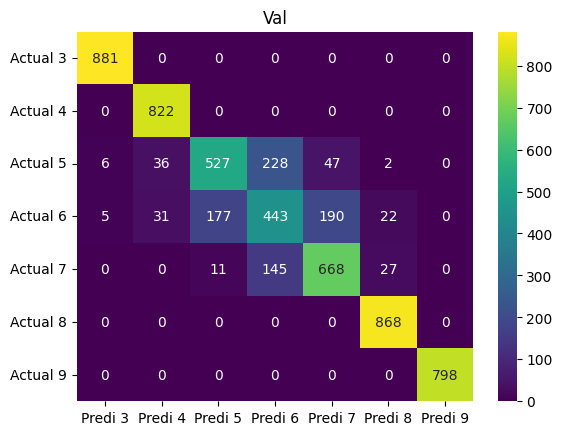

In [38]:
plot(y_val,y_pred5,'Val')

<Axes: title={'center': 'Entrenamiento'}>

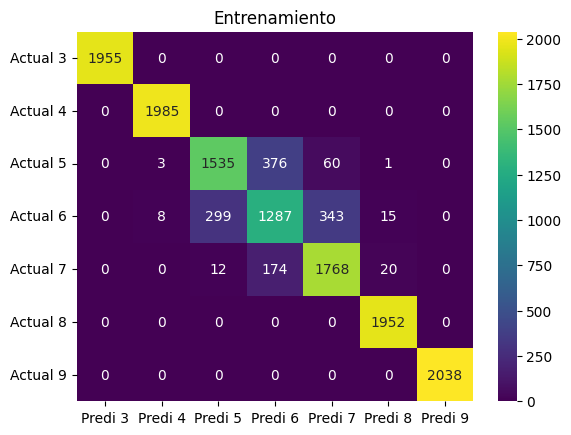

In [39]:
plot(y_train,y_train5,'Entrenamiento')

In [40]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.8437815975733064
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       881
           4       0.92      1.00      0.96       822
           5       0.74      0.62      0.68       846
           6       0.54      0.51      0.53       868
           7       0.74      0.78      0.76       851
           8       0.94      1.00      0.97       868
           9       1.00      1.00      1.00       798

    accuracy                           0.84      5934
   macro avg       0.84      0.85      0.84      5934
weighted avg       0.84      0.84      0.84      5934



In [41]:
resultadosModelo(y_train, y_train5)

Precisión: 0.9052129274817439
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       0.99      1.00      1.00      1985
           5       0.83      0.78      0.80      1975
           6       0.70      0.66      0.68      1952
           7       0.81      0.90      0.85      1974
           8       0.98      1.00      0.99      1952
           9       1.00      1.00      1.00      2038

    accuracy                           0.91     13831
   macro avg       0.90      0.90      0.90     13831
weighted avg       0.90      0.91      0.90     13831



## Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [207]:
base_classifier = RandomForestClassifier(n_estimators=400,criterion='gini', max_features='sqrt',random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo AdaBoost: {accuracy_bagging}")

Precisión del modelo AdaBoost: 0.9091675092686216


In [208]:

y_train_bagging = bagging_classifier.predict(X_train)


<Axes: title={'center': 'Val'}>

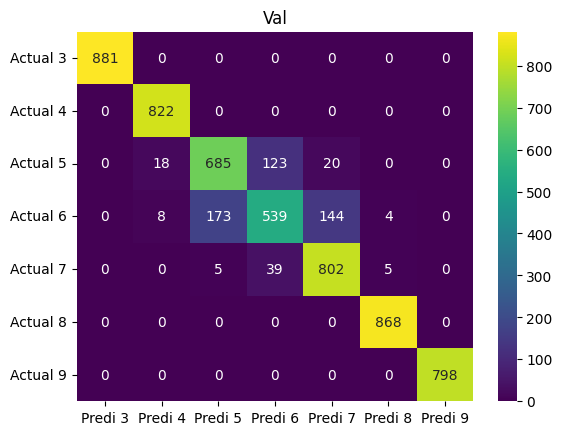

In [209]:
plot(y_val,y_pred_bagging,'Val')

In [210]:
resultadosModelo(y_val, y_pred_bagging)

Precisión: 0.9091675092686216
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.97      1.00      0.98       822
           5       0.79      0.81      0.80       846
           6       0.77      0.62      0.69       868
           7       0.83      0.94      0.88       851
           8       0.99      1.00      0.99       868
           9       1.00      1.00      1.00       798

    accuracy                           0.91      5934
   macro avg       0.91      0.91      0.91      5934
weighted avg       0.91      0.91      0.91      5934



<Axes: title={'center': 'Val'}>

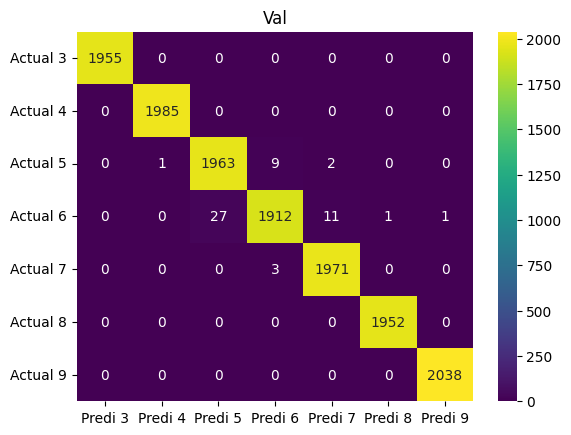

In [211]:
plot(y_train,y_train_bagging,'Val')

In [212]:
resultadosModelo(y_train, y_train_bagging)

Precisión: 0.9960234256380595
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1985
           5       0.99      0.99      0.99      1975
           6       0.99      0.98      0.99      1952
           7       0.99      1.00      1.00      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13831
   macro avg       1.00      1.00      1.00     13831
weighted avg       1.00      1.00      1.00     13831



In [58]:
base_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=1,p=1,weights='uniform')
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging2 = bagging_classifier.predict(X_val)
accuracy_bagging1 = accuracy_score(y_val, y_pred_bagging2)
print(f"Precisión del modelo Baggingt: {accuracy_bagging1}")

Precisión del modelo Baggingt: 0.8938321536905965


In [59]:
y_pred_bagging2 = bagging_classifier.predict(X_val)
y_train_bagging2 = bagging_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

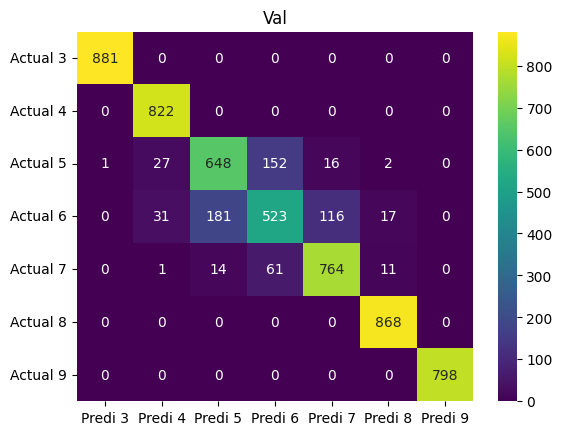

In [60]:
plot(y_val,y_pred_bagging2,'Val')

In [61]:
resultadosModelo(y_val, y_pred_bagging2)

Precisión: 0.8938321536905965
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.93      1.00      0.97       822
           5       0.77      0.77      0.77       846
           6       0.71      0.60      0.65       868
           7       0.85      0.90      0.87       851
           8       0.97      1.00      0.98       868
           9       1.00      1.00      1.00       798

    accuracy                           0.89      5934
   macro avg       0.89      0.90      0.89      5934
weighted avg       0.89      0.89      0.89      5934



<Axes: title={'center': 'Val'}>

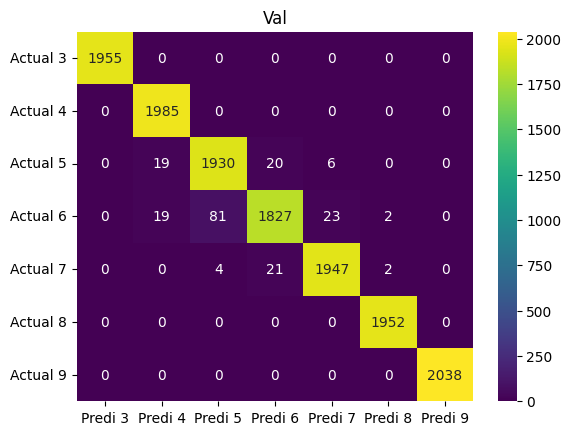

In [62]:
plot(y_train,y_train_bagging2,'Val')

In [63]:
resultadosModelo(y_train, y_train_bagging2)

Precisión: 0.9857566336490492
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       0.98      1.00      0.99      1985
           5       0.96      0.98      0.97      1975
           6       0.98      0.94      0.96      1952
           7       0.99      0.99      0.99      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           0.99     13831
   macro avg       0.99      0.99      0.99     13831
weighted avg       0.99      0.99      0.99     13831



In [137]:
base_classifier = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',max_depth=30,min_samples_leaf=1,min_samples_split=2,splitter='random')
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging3 = bagging_classifier.predict(X_val)
accuracy_bagging2 = accuracy_score(y_val, y_pred_bagging3)
print(f"Precisión del modelo Bagging: {accuracy_bagging2}")

Precisión del modelo Bagging: 0.9086619480957195


In [85]:
y_pred_bagging3 = bagging_classifier.predict(X_val)
y_train_bagging3 = bagging_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

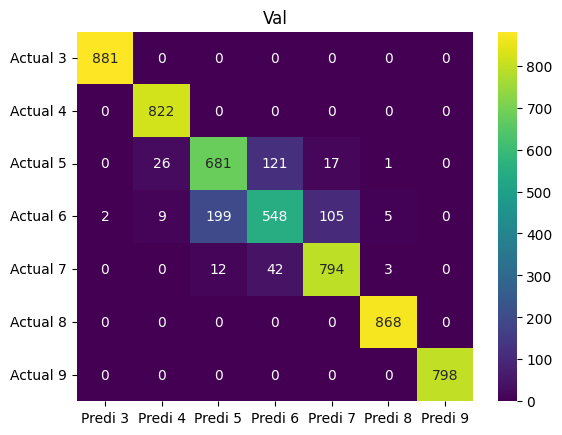

In [86]:
plot(y_val,y_pred_bagging3,'Val')

In [87]:
resultadosModelo(y_val, y_pred_bagging3)

Precisión: 0.9086619480957195
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.96      1.00      0.98       822
           5       0.76      0.80      0.78       846
           6       0.77      0.63      0.69       868
           7       0.87      0.93      0.90       851
           8       0.99      1.00      0.99       868
           9       1.00      1.00      1.00       798

    accuracy                           0.91      5934
   macro avg       0.91      0.91      0.91      5934
weighted avg       0.91      0.91      0.91      5934



<Axes: title={'center': 'Val'}>

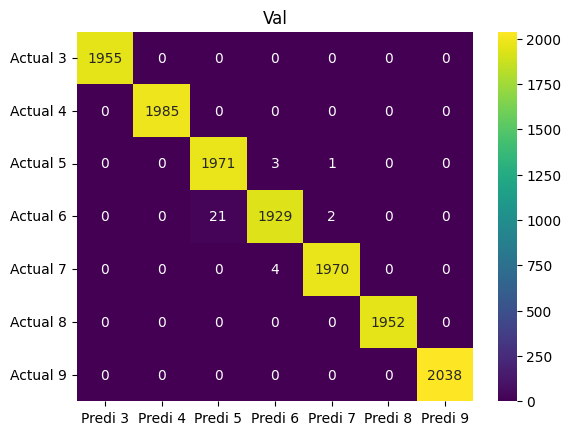

In [88]:
plot(y_train,y_train_bagging3,'Val')

In [90]:
resultadosModelo(y_train, y_train_bagging3)

Precisión: 0.9977586580869062
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1985
           5       0.99      1.00      0.99      1975
           6       1.00      0.99      0.99      1952
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13831
   macro avg       1.00      1.00      1.00     13831
weighted avg       1.00      1.00      1.00     13831



In [103]:
base_classifier = SVC(C=10,degree=1,gamma=1,kernel='rbf')
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging4 = bagging_classifier.predict(X_val)
accuracy_bagging3 = accuracy_score(y_val, y_pred_bagging3)
print(f"Precisión del modelo Bagging: {accuracy_bagging3}")

Precisión del modelo Bagging: 0.9086619480957195


In [104]:

y_train_bagging4 = bagging_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

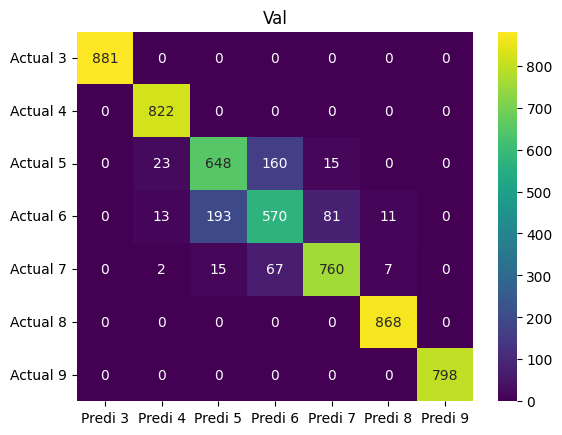

In [105]:
plot(y_val,y_pred_bagging4,'Val')

In [106]:
resultadosModelo(y_val, y_pred_bagging4)

Precisión: 0.9010785305021908
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.96      1.00      0.98       822
           5       0.76      0.77      0.76       846
           6       0.72      0.66      0.68       868
           7       0.89      0.89      0.89       851
           8       0.98      1.00      0.99       868
           9       1.00      1.00      1.00       798

    accuracy                           0.90      5934
   macro avg       0.90      0.90      0.90      5934
weighted avg       0.90      0.90      0.90      5934



<Axes: title={'center': 'Train'}>

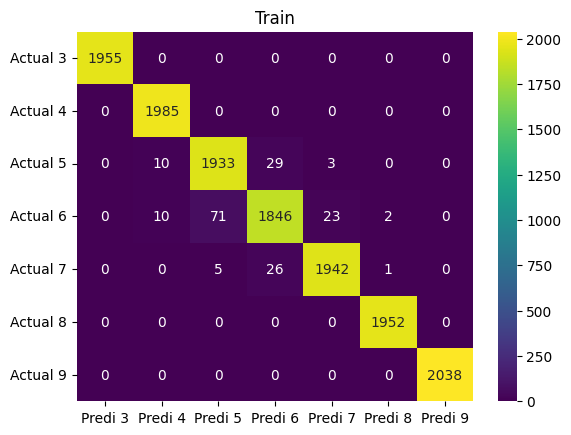

In [107]:
plot(y_train,y_train_bagging4,'Train')

In [108]:
resultadosModelo(y_train, y_train_bagging4)

Precisión: 0.9869857566336491
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       0.99      1.00      0.99      1985
           5       0.96      0.98      0.97      1975
           6       0.97      0.95      0.96      1952
           7       0.99      0.98      0.99      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           0.99     13831
   macro avg       0.99      0.99      0.99     13831
weighted avg       0.99      0.99      0.99     13831



In [97]:
base_classifier = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10000)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging5 = bagging_classifier.predict(X_val)
accuracy_bagging4 = accuracy_score(y_val, y_pred_bagging5)
print(f"Precisión del modelo Bagging: {accuracy_bagging4}")

Precisión del modelo Bagging: 0.8747893495112908


In [98]:
y_train_bagging5 = bagging_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

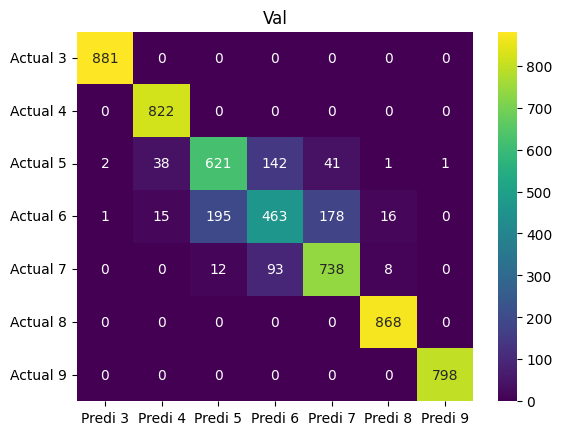

In [99]:
plot(y_val,y_pred_bagging5,'Val')

In [100]:
resultadosModelo(y_val, y_pred_bagging5)

Precisión: 0.8747893495112908
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.94      1.00      0.97       822
           5       0.75      0.73      0.74       846
           6       0.66      0.53      0.59       868
           7       0.77      0.87      0.82       851
           8       0.97      1.00      0.99       868
           9       1.00      1.00      1.00       798

    accuracy                           0.87      5934
   macro avg       0.87      0.88      0.87      5934
weighted avg       0.87      0.87      0.87      5934



<Axes: title={'center': 'Train'}>

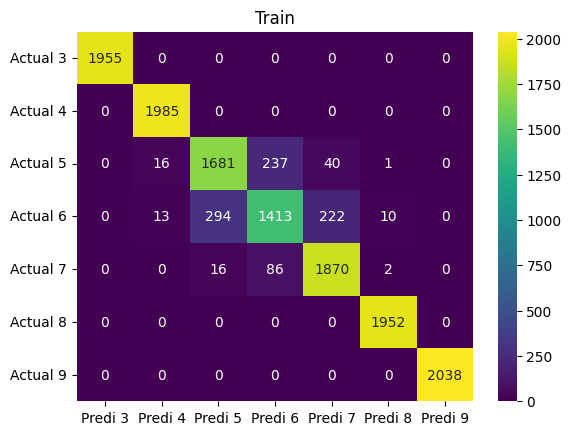

In [101]:
plot(y_train,y_train_bagging5,'Train')

In [102]:
resultadosModelo(y_train, y_train_bagging5)

Precisión: 0.9322536331429397
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       0.99      1.00      0.99      1985
           5       0.84      0.85      0.85      1975
           6       0.81      0.72      0.77      1952
           7       0.88      0.95      0.91      1974
           8       0.99      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           0.93     13831
   macro avg       0.93      0.93      0.93     13831
weighted avg       0.93      0.93      0.93     13831



## AdaBoost

In [138]:
base_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=42)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_AdaBoost = accuracy_score(y_val, y_pred_adaboost)
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost}")

Precisión del modelo AdaBoost: 0.9239973036737446


In [125]:
y_train_adaboost = adaboost_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

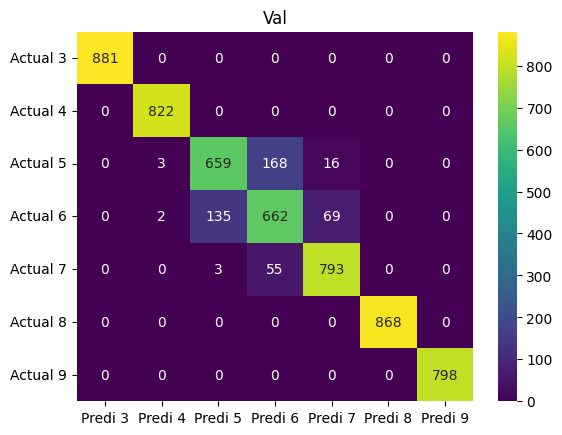

In [126]:
plot(y_val,y_pred_adaboost,'Val')

In [127]:
resultadosModelo(y_val, y_pred_adaboost)

Precisión: 0.9239973036737446
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.99      1.00      1.00       822
           5       0.83      0.78      0.80       846
           6       0.75      0.76      0.76       868
           7       0.90      0.93      0.92       851
           8       1.00      1.00      1.00       868
           9       1.00      1.00      1.00       798

    accuracy                           0.92      5934
   macro avg       0.92      0.92      0.92      5934
weighted avg       0.92      0.92      0.92      5934



<Axes: title={'center': 'Train'}>

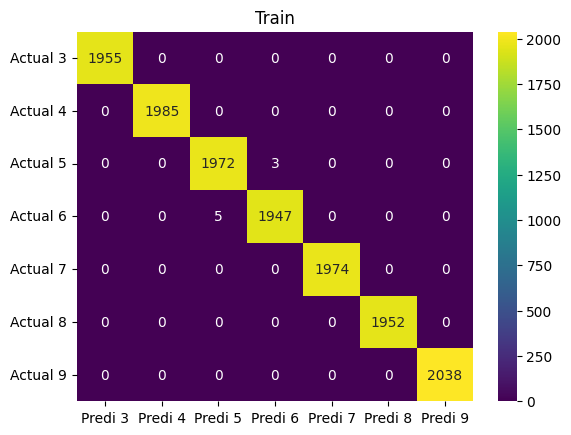

In [128]:
plot(y_train,y_train_adaboost,'Train')

In [129]:
resultadosModelo(y_train, y_train_adaboost)

Precisión: 0.9994215891837177
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1985
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13831
   macro avg       1.00      1.00      1.00     13831
weighted avg       1.00      1.00      1.00     13831



In [231]:
base_classifier = RandomForestClassifier(n_estimators=325, criterion='entropy', max_features='sqrt',random_state=42)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost1 = adaboost_classifier.predict(X_val)
accuracy_AdaBoost1 = accuracy_score(y_val, y_pred_adaboost1 )
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost1}")

Precisión del modelo AdaBoost: 0.9236602628918099


In [214]:
y_train_adaboost1 = adaboost_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

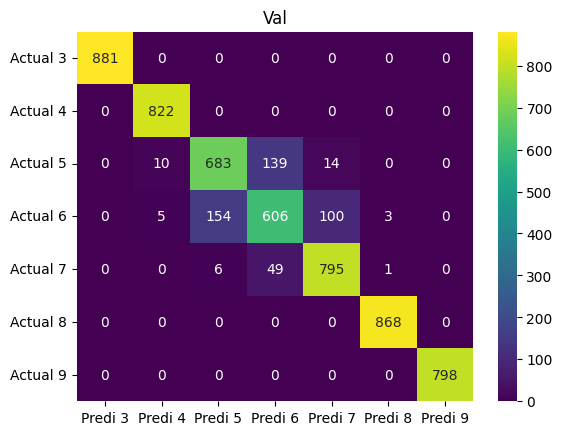

In [215]:
plot(y_val,y_pred_adaboost1,'Val')

In [216]:
resultadosModelo(y_val, y_pred_adaboost1)

Precisión: 0.9189416919447253
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.98      1.00      0.99       822
           5       0.81      0.81      0.81       846
           6       0.76      0.70      0.73       868
           7       0.87      0.93      0.90       851
           8       1.00      1.00      1.00       868
           9       1.00      1.00      1.00       798

    accuracy                           0.92      5934
   macro avg       0.92      0.92      0.92      5934
weighted avg       0.92      0.92      0.92      5934



<Axes: title={'center': 'Train'}>

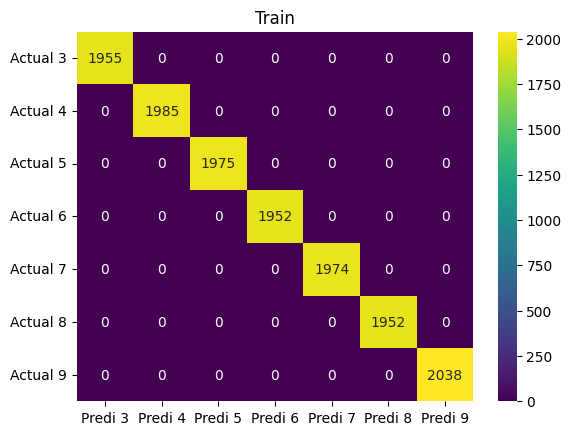

In [217]:
plot(y_train,y_train_adaboost1,'Train')

In [218]:
resultadosModelo(y_train, y_train_adaboost1)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1985
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13831
   macro avg       1.00      1.00      1.00     13831
weighted avg       1.00      1.00      1.00     13831



## Stacking

In [180]:
base_classifier1 = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=42)
base_classifier2 = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10000)
# adaboost_classifier = AdaBoostClassifier(base_classifier1, n_estimators=50, random_state=42)

In [193]:
base_classifiers = [
    
    ('kn', KNeighborsClassifier(algorithm='auto', leaf_size=10,n_neighbors=1,p=1,weights='uniform')),
    ('tree', AdaBoostClassifier(base_classifier1, n_estimators=50, random_state=42))
    
]
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=10)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_val)
accuracy_Stacking = accuracy_score(y_val, y_pred_stacking )
print(f"Precisión del modelo AdaBoost: {accuracy_Stacking }")

c:\Users\benju\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo AdaBoost: 0.9265251095382542


In [194]:
y_train_stacking = adaboost_classifier.predict(X_train)

<Axes: title={'center': 'Val'}>

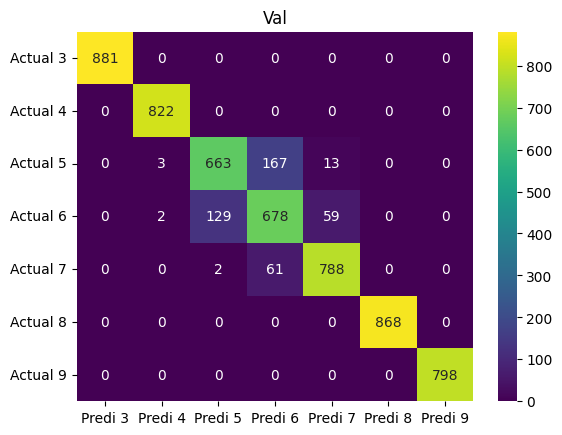

In [195]:
plot(y_val,y_pred_stacking,'Val')

In [196]:
resultadosModelo(y_val, y_pred_stacking)

Precisión: 0.9265251095382542
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       881
           4       0.99      1.00      1.00       822
           5       0.84      0.78      0.81       846
           6       0.75      0.78      0.76       868
           7       0.92      0.93      0.92       851
           8       1.00      1.00      1.00       868
           9       1.00      1.00      1.00       798

    accuracy                           0.93      5934
   macro avg       0.93      0.93      0.93      5934
weighted avg       0.93      0.93      0.93      5934



<Axes: title={'center': 'Train'}>

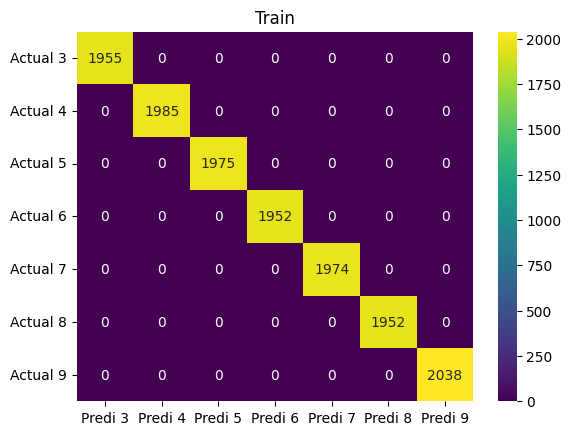

In [197]:
plot(y_train,y_train_stacking,'Train')

In [198]:
resultadosModelo(y_train, y_train_stacking)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1955
           4       1.00      1.00      1.00      1985
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1952
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1952
           9       1.00      1.00      1.00      2038

    accuracy                           1.00     13831
   macro avg       1.00      1.00      1.00     13831
weighted avg       1.00      1.00      1.00     13831

